In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import pickle

pd.options.display.max_columns = 25

# Data reading

In [3]:
# Reading the data
data_filename = 'data.csv'

# Creating the data DataFrame
df_data = pd.read_csv(data_filename)

In [4]:
df_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
0,HI,33,area_code_415,no,no,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3,no
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,yes
2,CT,37,area_code_408,no,no,0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,2,3.97,3,no
3,TN,106,area_code_415,no,no,0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,9,2.27,2,no
4,TX,123,area_code_408,no,no,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,MT,10,area_code_510,no,no,0,183.0,103,31.11,214.8,77,18.26,206.4,73,9.29,8.7,6,2.35,2,no
2996,OR,135,area_code_415,no,no,0,263.8,66,44.85,251.3,116,21.36,200.1,112,9.00,8.4,2,2.27,5,yes
2997,AK,52,area_code_510,no,no,0,148.3,83,25.21,181.6,79,15.44,155.6,104,7.00,8.3,6,2.24,3,no
2998,TN,39,area_code_408,no,no,0,187.2,110,31.82,114.7,116,9.75,104.7,83,4.71,13.2,5,3.56,1,no


# Data Understanding

In [5]:
df_data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'payment_delay'],
      dtype='object')

In [6]:
df_data.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
payment_delay                     object
dtype: object

In [7]:
df_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,100.510000,7.977333,180.456533,100.228667,30.678167,200.034000,100.247333,17.003100,201.099633,99.939667,9.049577,10.206500,4.495333,2.756263,1.591667
std,39.485782,13.730125,54.098371,19.763769,9.196706,50.127406,19.761638,4.260769,50.863770,19.669680,2.288908,2.749696,2.489051,0.742311,1.314346
min,1.000000,0.000000,0.000000,0.000000,0.000000,22.300000,12.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.700000,87.000000,24.430000,165.800000,87.000000,14.090000,166.975000,87.000000,7.517500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.400000,101.000000,30.500000,199.900000,101.000000,16.990000,201.600000,100.000000,9.070000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,18.000000,216.800000,113.000000,36.860000,233.700000,113.000000,19.860000,235.225000,113.000000,10.582500,12.000000,6.000000,3.240000,2.000000
max,233.000000,52.000000,346.800000,165.000000,58.960000,363.700000,169.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df_data['total_minutes'] = df_data['total_day_minutes'] + \
                           df_data['total_eve_minutes'] + \
                           df_data['total_night_minutes'] + \
                           df_data['total_intl_minutes']
df_data['total_calls'] = df_data['total_day_calls'] + \
                           df_data['total_eve_calls'] + \
                           df_data['total_night_calls'] + \
                           df_data['total_intl_calls']
df_data['total_charge'] = df_data['total_day_charge'] + \
                           df_data['total_eve_charge'] + \
                           df_data['total_night_charge'] + \
                           df_data['total_intl_charge']
df_data['cust_supp_rate'] = df_data['number_customer_service_calls'] / df_data['account_length']
df_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,total_minutes,total_calls,total_charge,cust_supp_rate
0,HI,33,area_code_415,no,no,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3,no,572.9,318,60.91,0.090909
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,yes,689.6,282,75.04,0.012500
2,CT,37,area_code_408,no,no,0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,2,3.97,3,no,634.2,343,58.64,0.081081
3,TN,106,area_code_415,no,no,0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,9,2.27,2,no,553.9,351,50.85,0.018868
4,TX,123,area_code_408,no,no,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,no,621.0,284,70.28,0.024390


# Hypotheses
 - More call center calls --> customers are facing more problems
 - Higher costs --> Customers have problems paying the bills

# Data Preparation

In [9]:
# See missing data
df_data.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
payment_delay                    0
total_minutes                    0
total_calls                      0
total_charge                     0
cust_supp_rate                   0
dtype: int64

In [10]:
# Check for duplicate data
df_data.duplicated().sum()

0

In [11]:
df_no = df_data[df_data['payment_delay'] == 'no']
df_yes = df_data[df_data['payment_delay'] == 'yes']
df_yes.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,total_minutes,total_calls,total_charge,cust_supp_rate
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,yes,689.6,282,75.04,0.012500
7,UT,110,area_code_415,no,no,0,271.1,108,46.09,237.0,122,20.15,239.9,122,10.80,9.8,5,2.65,2,yes,757.8,357,79.69,0.018182
9,MI,119,area_code_510,yes,yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,yes,559.6,366,58.77,0.008403
17,TX,72,area_code_415,yes,no,0,286.1,101,48.64,306.1,94,26.02,232.8,89,10.48,10.3,1,2.78,4,yes,835.3,285,87.92,0.055556
20,TX,82,area_code_415,no,no,0,189.2,81,32.16,184.4,117,15.67,255.8,83,11.51,10.6,5,2.86,3,yes,640.0,286,62.20,0.036585


In [12]:
df_no.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,cust_supp_rate
count,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000
mean,99.990336,8.512949,175.806997,100.248550,29.887762,198.259644,100.336683,16.852319,200.256320,99.996908,9.011631,10.130421,4.528798,2.735717,1.485504,584.453382,305.110939,58.487429,0.024348
std,39.581515,13.996993,50.014753,19.726153,8.502478,49.956122,19.764935,4.246245,50.780369,19.683300,2.285141,2.724591,2.449064,0.735540,1.173339,83.214279,34.431473,9.409502,0.090567
min,1.000000,0.000000,0.000000,0.000000,0.000000,22.300000,12.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.500000,192.000000,23.250000,0.000000
25%,73.000000,0.000000,142.850000,87.000000,24.285000,163.950000,87.000000,13.935000,166.300000,87.000000,7.480000,8.400000,3.000000,2.270000,1.000000,528.600000,282.000000,52.220000,0.006803
50%,100.000000,0.000000,176.600000,100.000000,30.020000,198.400000,101.000000,16.860000,200.300000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000,589.100000,305.000000,59.050000,0.013514
75%,127.000000,21.000000,211.650000,113.000000,35.980000,232.200000,114.000000,19.740000,233.650000,113.000000,10.515000,11.900000,6.000000,3.210000,2.000000,641.050000,328.000000,65.220000,0.024590
max,233.000000,52.000000,315.600000,163.000000,53.650000,359.300000,169.000000,30.540000,395.000000,175.000000,17.770000,19.700000,18.000000,5.320000,7.000000,846.000000,416.000000,87.480000,3.000000


In [13]:
# Only ~14% of customers are paying late (413 late payment, 2587 no late payment)
# The late payment group has more minutes for day/eve but simmilar number of calls (so higher charge)
# Account length -- simmilar
# cust_supp_rate higher than the one from the people with no payment delay, signyfying that more people are calling to support
df_yes.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,cust_supp_rate
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,103.765133,4.622276,209.580872,100.104116,35.629201,211.148426,99.687651,17.947579,206.382082,99.581114,9.287264,10.683051,4.285714,2.884964,2.256659,637.794431,303.658596,65.749007,0.028448
std,38.769615,11.377362,67.943348,20.021501,11.550457,49.828265,19.755711,4.235185,51.128992,19.604124,2.300929,2.859689,2.720065,0.771956,1.849163,112.968494,33.714710,13.756177,0.056580
min,3.000000,0.000000,46.500000,44.000000,7.910000,75.300000,48.000000,6.400000,47.400000,42.000000,2.130000,0.000000,0.000000,0.000000,0.000000,319.900000,205.000000,27.020000,0.000000
25%,77.000000,0.000000,154.500000,86.000000,26.270000,175.900000,87.000000,14.950000,170.000000,85.000000,7.650000,8.900000,2.000000,2.400000,1.000000,537.500000,281.000000,53.520000,0.007874
50%,103.000000,0.000000,217.600000,101.000000,36.990000,209.900000,99.000000,17.840000,206.400000,99.000000,9.290000,10.700000,4.000000,2.890000,2.000000,662.300000,303.000000,68.430000,0.018182
75%,128.000000,0.000000,267.100000,114.000000,45.410000,246.500000,113.000000,20.950000,243.300000,112.000000,10.950000,12.800000,6.000000,3.460000,4.000000,727.800000,327.000000,77.100000,0.038462
max,225.000000,48.000000,346.800000,165.000000,58.960000,363.700000,159.000000,30.910000,381.600000,155.000000,17.170000,20.000000,20.000000,5.400000,9.000000,885.000000,408.000000,96.150000,1.000000


In [14]:
percent_cs_calls_yes =  len(df_yes[df_yes['number_customer_service_calls'] > 1]) / len(df_yes)
percent_cs_calls_no =  len(df_no[df_no['number_customer_service_calls'] > 1]) / len(df_no)
print(f"% of cs calls for people with late payments: {percent_cs_calls_yes}")
print(f"% of cs calls for people with NO late payments: {percent_cs_calls_no}")

% of cs calls for people with late payments: 0.5544794188861986
% of cs calls for people with NO late payments: 0.4275222265172014


In [15]:
df_yes['state'].value_counts(), df_no['state'].value_counts()

(TX    19
 MN    15
 MS    14
 NJ    14
 OK    13
 MD    13
 WV    13
 OR    12
 WA    12
 AR    12
 MT    11
 UT    11
 NY    11
 ME    10
 TN    10
 ID    10
 MA    10
 MI    10
 AL     9
 CT     9
 WY     9
 NH     9
 NC     9
 DE     8
 KS     8
 GA     8
 SD     7
 CA     7
 VT     7
 IA     7
 AZ     7
 NV     7
 MO     6
 IN     6
 SC     6
 KY     5
 OH     5
 WI     5
 CO     5
 RI     5
 FL     5
 HI     4
 DC     4
 LA     4
 VA     4
 PA     4
 AK     3
 ND     3
 NM     3
 IL     3
 NE     2
 Name: state, dtype: int64,
 WV    88
 VA    72
 AL    68
 WY    68
 MN    68
 OH    63
 ID    62
 MI    61
 NY    60
 WI    59
 UT    56
 NM    56
 CT    56
 IL    55
 VT    54
 MA    54
 TX    53
 OR    52
 IN    52
 FL    52
 RI    51
 MT    51
 ND    51
 ME    50
 NH    50
 CO    50
 NE    49
 OK    49
 NJ    49
 MS    49
 AZ    48
 SC    48
 KY    47
 DC    47
 AR    47
 KS    45
 NC    45
 DE    44
 LA    44
 HI    43
 GA    42
 NV    42
 WA    42
 TN    42
 MO    41
 AK    41
 M

<BarContainer object of 51 artists>

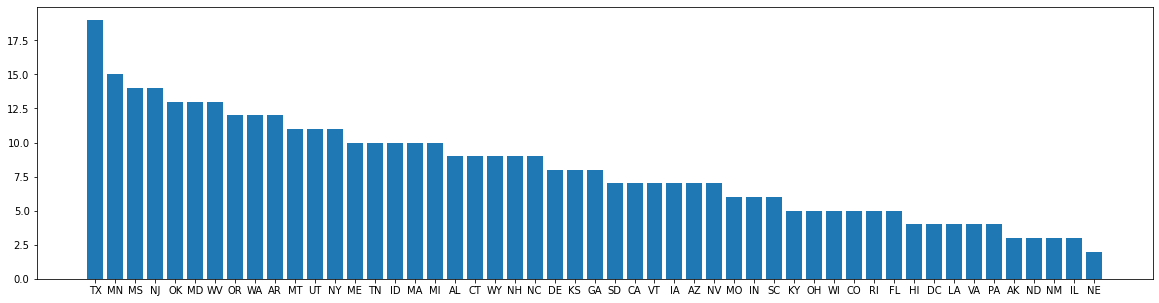

In [16]:
fig = plt.figure(figsize = (20, 5))

state_names_yes = df_yes['state'].value_counts().index
state_counts_yes = df_yes['state'].value_counts().values

plt.bar(state_names_yes, state_counts_yes)

<BarContainer object of 51 artists>

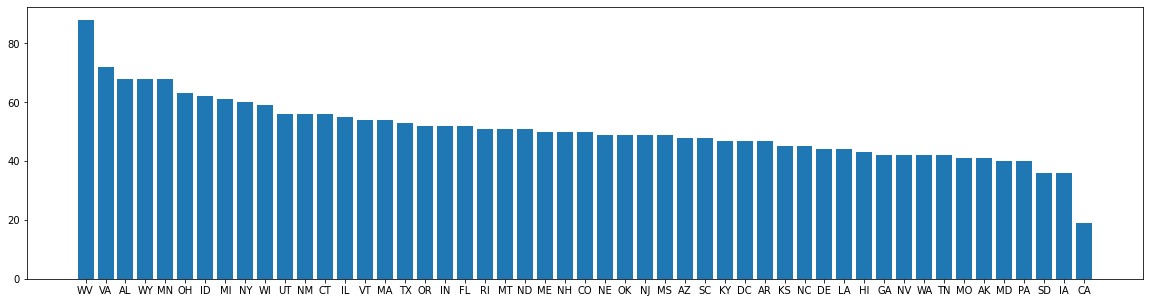

In [17]:
fig = plt.figure(figsize = (20, 5))

state_names_no = df_no['state'].value_counts().index
state_counts_no = df_no['state'].value_counts().values

plt.bar(state_names_no, state_counts_no)

In [18]:
df_yes[df_yes['state'] == 'TX'].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,cust_supp_rate
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,116.157895,3.000000,223.947368,98.842105,38.071053,223.484211,103.368421,18.996316,216.489474,99.368421,9.742632,11.031579,4.210526,2.978421,1.894737,674.952632,305.789474,69.788421,0.018102
std,41.967267,9.024658,61.504213,20.301240,10.457457,52.819307,21.985375,4.489014,43.926604,21.975265,1.977787,2.006116,3.172432,0.543009,1.410072,104.886920,28.206735,12.485255,0.016395
min,65.000000,0.000000,81.900000,67.000000,13.920000,151.000000,67.000000,12.840000,138.100000,53.000000,6.210000,7.200000,1.000000,1.940000,0.000000,460.000000,267.000000,47.480000,0.000000
25%,86.000000,0.000000,184.050000,81.500000,31.285000,181.300000,87.000000,15.410000,194.250000,85.500000,8.740000,10.050000,2.000000,2.715000,1.000000,607.800000,285.500000,60.085000,0.006085
50%,106.000000,0.000000,225.900000,101.000000,38.400000,209.100000,104.000000,17.770000,214.000000,104.000000,9.630000,10.700000,4.000000,2.890000,2.000000,695.200000,307.000000,74.930000,0.016807
75%,137.500000,0.000000,268.250000,107.500000,45.605000,258.950000,115.500000,22.010000,253.450000,108.500000,11.405000,12.650000,5.500000,3.415000,3.000000,746.400000,320.000000,78.895000,0.026726
max,208.000000,31.000000,326.500000,141.000000,55.510000,306.100000,150.000000,26.020000,287.700000,152.000000,12.950000,13.800000,14.000000,3.730000,4.000000,835.300000,376.000000,87.920000,0.055556


no     297
yes    116
Name: international_plan, dtype: int64

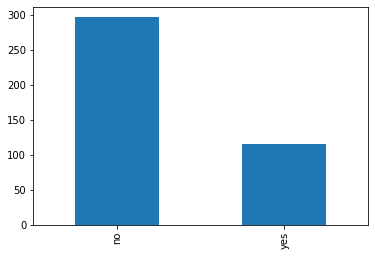

In [19]:
df_yes['international_plan'].value_counts().plot(kind='bar')
df_yes['international_plan'].value_counts() # --> 26.91% yes, 68,91% no

no     2422
yes     165
Name: international_plan, dtype: int64

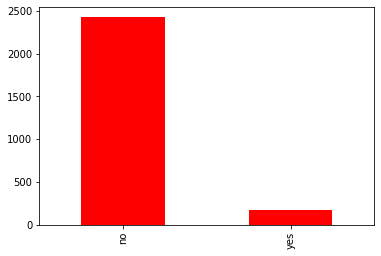

In [20]:
df_no['international_plan'].value_counts().plot(kind='bar', color='red')
df_no['international_plan'].value_counts() # 6,38% yes, 93,62% no

In [21]:
# Checking the distribution on areas
df_yes['area_code'].value_counts(), df_no['area_code'].value_counts()

(area_code_415    199
 area_code_510    118
 area_code_408     96
 Name: area_code, dtype: int64,
 area_code_415    1274
 area_code_408     661
 area_code_510     652
 Name: area_code, dtype: int64)

<BarContainer object of 3 artists>

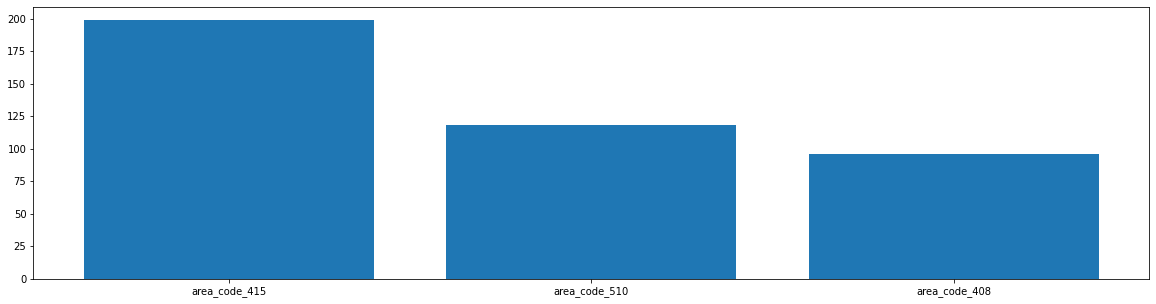

In [22]:
fig = plt.figure(figsize = (20, 5))

state_names_yes = df_yes['area_code'].value_counts().index
state_counts_yes = df_yes['area_code'].value_counts().values

plt.bar(state_names_yes, state_counts_yes)

<BarContainer object of 3 artists>

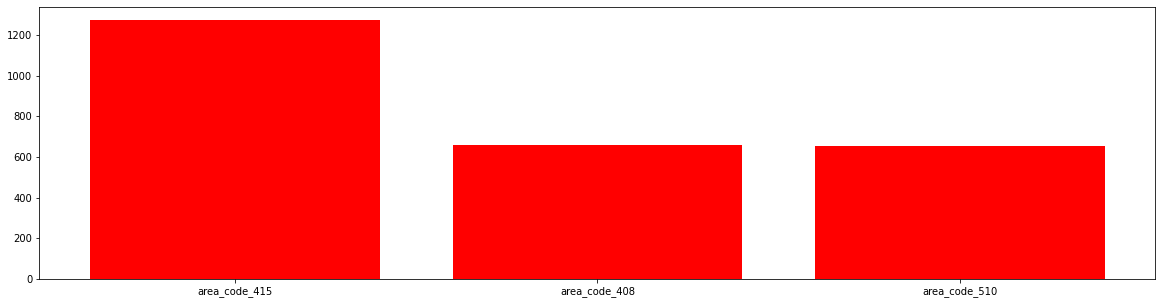

In [23]:
fig = plt.figure(figsize = (20, 5))

state_names_no = df_no['area_code'].value_counts().index
state_counts_no = df_no['area_code'].value_counts().values

plt.bar(state_names_no, state_counts_no, color='red')

In [24]:
df_data['payment_delay'].replace(['no', 'yes'], [0, 1], inplace=True)
df_data['international_plan'].replace(['no', 'yes'], [0, 1], inplace=True)
df_data['voice_mail_plan'].replace(['no', 'yes'], [0, 1], inplace=True)

# # Using Label Encoder for the other categorical columns with more values
# # le = LabelEncoder()

# d = defaultdict(LabelEncoder)

# # Creating the zones df
# zone_df = df_data[['state', 'area_code']]

# # Encoding the variable
# fit = zone_df.apply(lambda x: d[x.name].fit_transform(x))

# # Replacing categorical with numerical
# df_data['state'] = fit['state']
# df_data['area_code'] = fit['area_code']

In [25]:
corr_mat = df_data.corr().round(2)
corr_mat

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,total_minutes,total_calls,total_charge,cust_supp_rate
account_length,1.00,0.03,-0.04,-0.05,-0.00,0.02,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.02,0.01,0.02,-0.00,0.03,-0.01,0.01,-0.01,-0.27
international_plan,0.03,1.00,0.02,0.02,0.03,0.01,0.03,0.01,0.02,0.01,-0.03,-0.01,-0.03,0.03,0.02,0.03,-0.01,0.26,0.01,0.01,0.03,-0.03
voice_mail_plan,-0.04,0.02,1.00,0.95,0.01,0.01,0.01,0.01,-0.01,0.01,0.00,-0.01,0.00,0.00,-0.02,0.00,-0.02,-0.11,0.01,-0.00,0.01,0.01
number_vmail_messages,-0.05,0.02,0.95,1.00,0.01,0.01,0.01,0.01,-0.01,0.01,0.00,-0.02,0.00,0.00,-0.00,0.00,-0.01,-0.10,0.01,-0.01,0.02,0.01
total_day_minutes,-0.00,0.03,0.01,0.01,1.00,0.01,1.00,-0.00,0.01,-0.00,0.03,-0.01,0.03,-0.03,0.01,-0.03,0.00,0.22,0.62,0.00,0.88,-0.01
total_day_calls,0.02,0.01,0.01,0.01,0.01,1.00,0.01,-0.01,0.03,-0.01,-0.00,-0.03,-0.00,0.02,0.01,0.02,-0.01,-0.00,0.00,0.58,0.01,0.01
total_day_charge,-0.00,0.03,0.01,0.01,1.00,0.01,1.00,-0.00,0.01,-0.00,0.03,-0.01,0.03,-0.03,0.01,-0.03,0.00,0.22,0.62,0.00,0.88,-0.01
total_eve_minutes,-0.01,0.01,0.01,0.01,-0.00,-0.01,-0.00,1.00,-0.01,1.00,-0.02,0.01,-0.02,0.00,0.01,0.00,-0.01,0.09,0.54,-0.00,0.40,0.01
total_eve_calls,-0.01,0.02,-0.01,-0.01,0.01,0.03,0.01,-0.01,1.00,-0.01,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.02,-0.01,0.00,0.59,0.00,-0.03
total_eve_charge,-0.01,0.01,0.01,0.01,-0.00,-0.01,-0.00,1.00,-0.01,1.00,-0.02,0.01,-0.02,0.00,0.01,0.00,-0.01,0.09,0.54,-0.00,0.40,0.01


<AxesSubplot:>

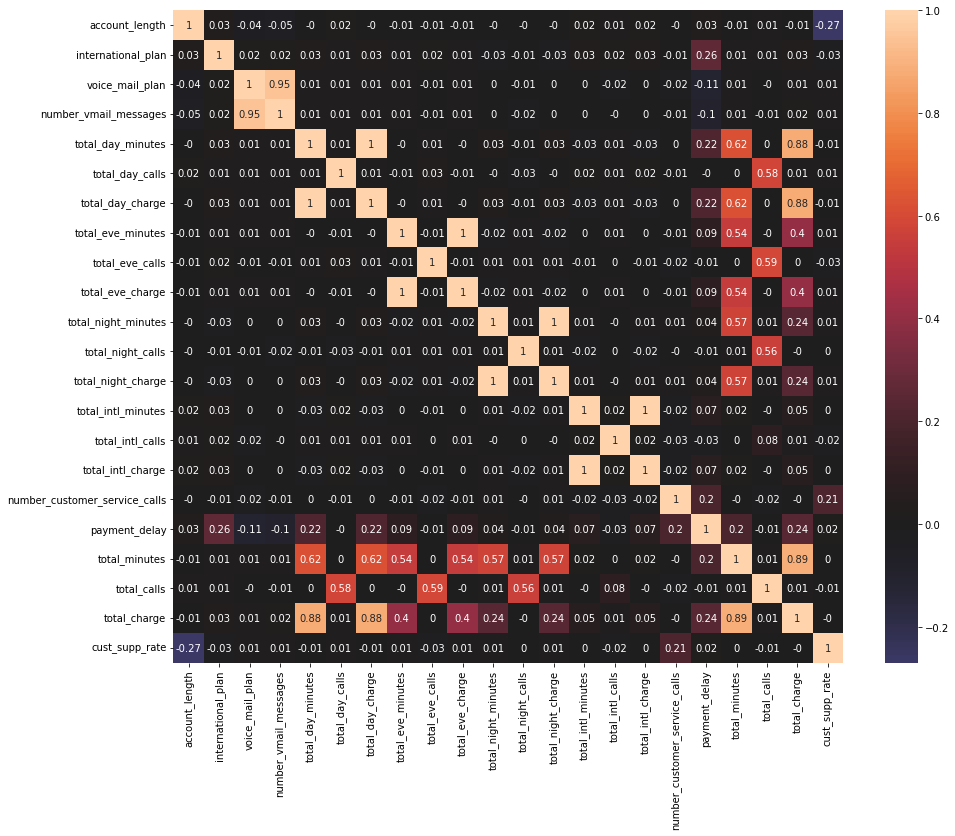

In [26]:
# We can see that the pppayment delay is most correalted with the total charge, total minutes (also correalted with total charge -- with a focus on day calls) and number of customer service calls
# Payment delay also correlated with international plan, but that is also causing the charge to increase (from intl calls)
plt.figure(figsize=(15, 12))
sns.heatmap(data=corr_mat, annot=True, center=0)

# Building the model

In [27]:
# Dropping the unused columns
df = df_data[['international_plan', 'total_day_minutes', 'total_day_charge', 'number_customer_service_calls', 'total_minutes', 'total_charge', 'payment_delay']]
df.head(5)

,international_plan,total_day_minutes,total_day_charge,number_customer_service_calls,total_minutes,total_charge,payment_delay
0,0,200.5,34.09,3,572.9,60.91,0
1,1,276.5,47.01,1,689.6,75.04,1
2,0,134.9,22.93,3,634.2,58.64,0
3,0,119.2,20.26,2,553.9,50.85,0
4,0,260.9,44.35,3,621.0,70.28,0


In [28]:
# Spliting data in features and label
X = df.drop(['payment_delay'], axis=1)
y = df['payment_delay']

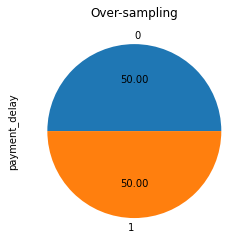

In [29]:
# Oversampling data from the minority class
ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [30]:
# combine and reshufffle the data
df_res = pd.concat([X_res, y_res], axis=1)
df_res = df_res.sample(frac = 1)

In [31]:
# splitting the data in attributes and targets again
X = df_res.drop(['payment_delay'], axis=1)
y = df_res['payment_delay']

In [32]:
# Splitting dataframe into Features and targets
train_limit = int(0.8 * len(X))
val_limit = int(0.8 * len(X))
X_train = X[:train_limit]
y_train = y[:train_limit]
X_val = X[train_limit:val_limit]
y_val = y[train_limit:val_limit]
X_test = X[val_limit:]
y_test = y[val_limit:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((4139, 6), (4139,), (0, 6), (0,), (1035, 6), (1035,))

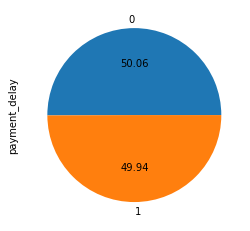

In [33]:
ax = y_train.value_counts().plot.pie(autopct='%.2f')

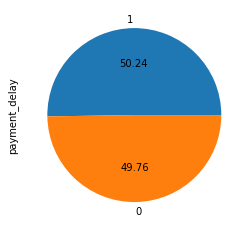

In [34]:
ax = y_test.value_counts().plot.pie(autopct='%.2f')

# Scaling the DataFrame

In [35]:
# sc = StandardScaler()
# scaled_df = sc.fit_transform(df)
# scaled_df

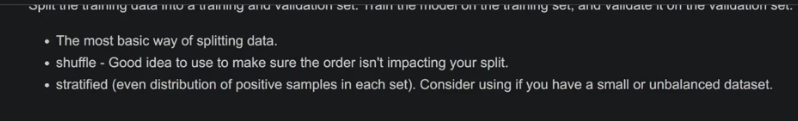

https://www.youtube.com/watch?v=-8s9KuNo5SA

# Creating the models

## KNN Classifier

In [36]:
# Grid Search
# k_range = list(range(1,20))
# weight_options = ["uniform", "distance"]
# # leaf_size=[10,20,30,40,50,60]
# p=[1,2,3,4,5]
# algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
# param_grid = dict(n_neighbors = k_range, weights = weight_options,algorithm= algorithm ,leaf_size = leaf_size , p =p)

In [37]:
# Creating the KNN Classifier model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# If trying to use gridsearch, uncomment this and comment the knn.fit above
# grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
# grid.fit(X_train,y_train)

# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

In [39]:
# Accuracy score = mean accuracy on the given test data and labels
knn.score(X_test, y_test)

0.8570048309178744

### Calculating the accuracy of the model results

In [40]:
y_pred = knn.predict(X_test)

# Creating the confusion matrix (diagonal is the correct classification)
cm = confusion_matrix(y_test, y_pred)
cm # 85.02% accuracy

array([[395, 120],
       [ 28, 492]], dtype=int64)

Text(42.0, 0.5, 'Truth')

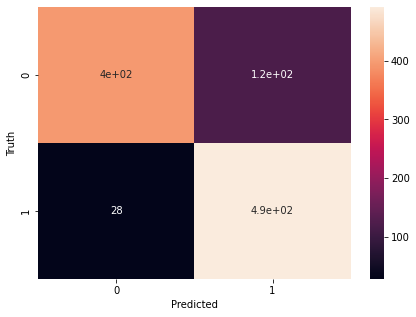

In [41]:
%matplotlib inline

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
y_test, y_pred

(4018    1
 2089    0
 3438    1
 650     0
 2464    0
        ..
 1607    0
 2271    1
 3869    1
 98      0
 345     0
 Name: payment_delay, Length: 1035, dtype: int64,
 array([1, 0, 1, ..., 1, 0, 0], dtype=int64))

In [43]:
# Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.77      0.84       515\n           1       0.80      0.95      0.87       520\n\n    accuracy                           0.86      1035\n   macro avg       0.87      0.86      0.86      1035\nweighted avg       0.87      0.86      0.86      1035\n'

In [44]:
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average='macro') # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
rec_score = recall_score(y_test, y_pred, average='macro') # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
# F1 = 2 * (precision * recall) / (precision + recall)
f1_score = f1_score(y_test, y_pred, average='macro')# The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
print(f"Accuracy score: {acc_score}")
print(f"Precision score: {prec_score}")
print(f"Recall score: {rec_score}")
print(f"F1 score: {f1_score}")

Accuracy score: 0.8570048309178744
Precision score: 0.8688638575997776
Recall score: 0.856572068707991
F1 score: 0.855737717269282


## Random Forest

In [45]:
# Creating the model
rf = RandomForestClassifier(criterion="gini", # measure the quality of a split
                            max_depth=8, # maximum depth of the tree
                            min_samples_split=10, #  minimum number of samples required to split an internal node
                            random_state=5) # Controls both the randomness of the bootstrapping of the samples used when building trees

In [46]:
# Fit the data to the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [47]:
# Check the importance of the features for the model
rf.feature_importances_, X_train.columns

(array([0.16217144, 0.08004181, 0.08716669, 0.24435878, 0.1466836 ,
        0.27957768]),
 Index(['international_plan', 'total_day_minutes', 'total_day_charge',
        'number_customer_service_calls', 'total_minutes', 'total_charge'],
       dtype='object'))

In [48]:
y_pred = rf.predict(X_test)

# Creating the confusion matrix (diagonal is the correct classification)
cm = confusion_matrix(y_test, y_pred)
cm # 88.55% accuracy

array([[472,  43],
       [ 69, 451]], dtype=int64)

Text(42.0, 0.5, 'Truth')

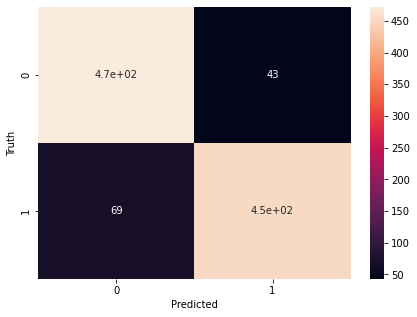

In [49]:
%matplotlib inline

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
y_test, y_pred

(4018    1
 2089    0
 3438    1
 650     0
 2464    0
        ..
 1607    0
 2271    1
 3869    1
 98      0
 345     0
 Name: payment_delay, Length: 1035, dtype: int64,
 array([1, 0, 1, ..., 1, 0, 0], dtype=int64))

In [51]:
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average='macro') # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
rec_score = recall_score(y_test, y_pred, average='macro') # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
print(f"Accuracy score: {acc_score}")
print(f"Precision score: {prec_score}")
print(f"Recall score: {rec_score}")

Accuracy score: 0.8917874396135266
Precision score: 0.892706937969123
Recall score: 0.8919062733383122


### Random Forest Classifier has higher accuracy than KNN (88% > 85%)

# Pickling the Model for Deployment

In [55]:
pickle.dump(rf, open('model/classmodel.pkl', 'wb'))

In [56]:
pickled_model = pickle.load(open('model/classmodel.pkl', 'rb'))

In [58]:
# Prediction using the pickled serialized model
pickled_model.predict(X_test)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)